# Clustering with K-Means++

In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# read csv file 'cleaned data'
df = pd.read_csv('cleaned_data.csv')

# drop 'Gender' 'Post-code' 'Balance' 'Home Owner' Columns
df = df.drop(['Gender', 'Post-code','Balance','Home Owner'], axis=1)

In [51]:
def pca_df(X):
    scaler = StandardScaler()
    scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    pca.fit(scaled)
    pca_df = pca.transform(scaled)
    pca_columns=['pca_1','pca_2']
    pca_df = pd.DataFrame(pca_df, columns=pca_columns)
    return pca_df
    
# Define a function named 'plot_evlow_curve'
def plot_elbow_curve(X):
    
    # Create an empty list to store inertias
    inertias = []
    
    # Define the range of cluster numbers to evaluate
    cluster_range = range(1,9)
    
    # Iterate over each cluster number
    for k in cluster_range:
        
        # Instantiate a KMeans object with k clusters
        kmeans = KMeans(n_clusters=k)
        
        # Fit the KMeans model on the input data
        kmeans.fit(X)
        
        # Append the inertia of the model to the 'inertias' list
        inertias.append(kmeans.inertia_)
    
    # Plot the Elbow curve using cluster range and corresponding inertias
    plt.plot(cluster_range, inertias, 'bo-')
    
    # Set x-axis label
    plt.xlabel("Cluster")
    
    # Set y-axis label
    plt.ylabel("Inertia")
    
    # Set title of the plot
    plt.title('ElBow Curve')
    
    # Display the plot
    plt.show()


## Clustering number is 2

     Income  Employed  Education   Age  Colour
0     10500         0          1  25.0       5
1     26525         1          0  25.0       1
2      8230         0          1  25.0       4
3     25000         0          2  19.0       5
4     15250         0          1  23.0       4
..      ...       ...        ...   ...     ...
115   45050         1          2  54.0       5
116   11250         0          1  29.0       4
117    7450         0          0  19.0       4
118   12250         0          2  25.0       5
119    8450         0          1  23.0       4

[120 rows x 5 columns]
[0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0
 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 0 0
 0 0 0 0 1 0 0 0 0]
[[1.85641975e+04 1.35802469e-01 9.38271605e-01 2.89012346e+01
  3.61728395e+00]
 [6.23764103e+04 6.41025641e-01 1.17948718e+00 3.79230769e+01
  2.41025641e+00]]
0.6190

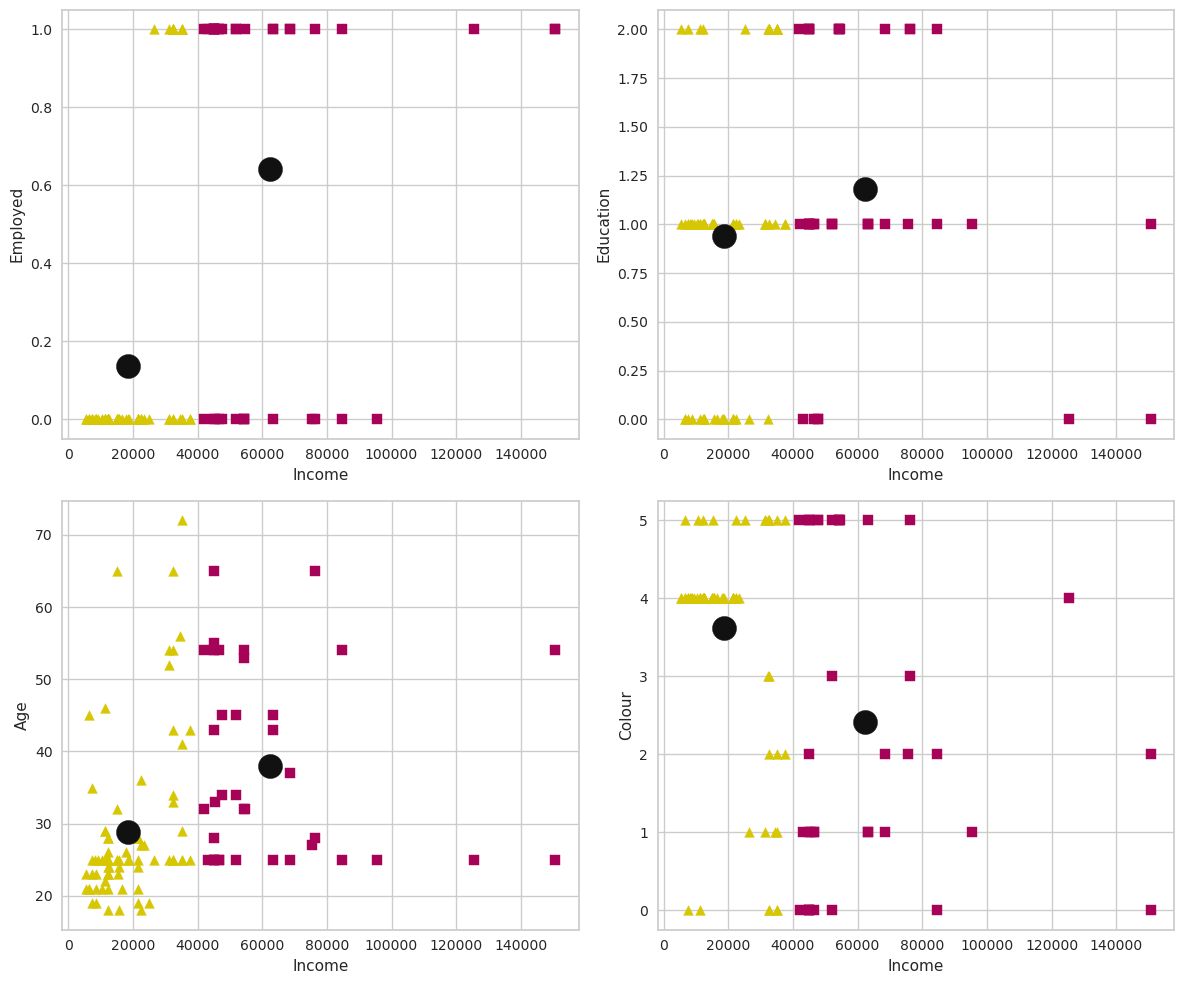

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


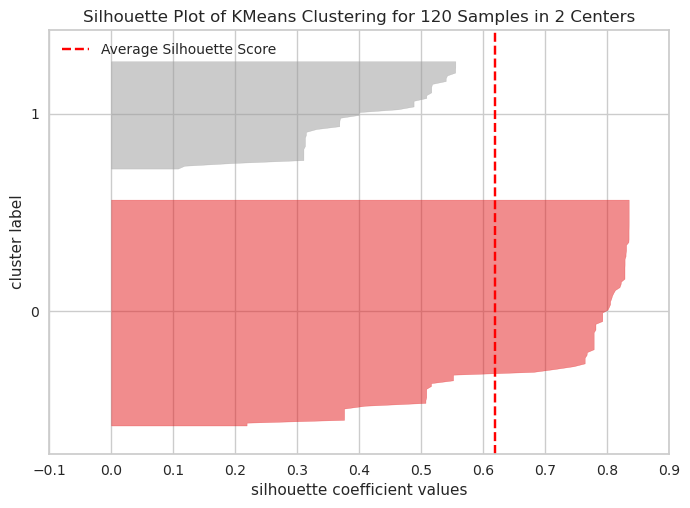

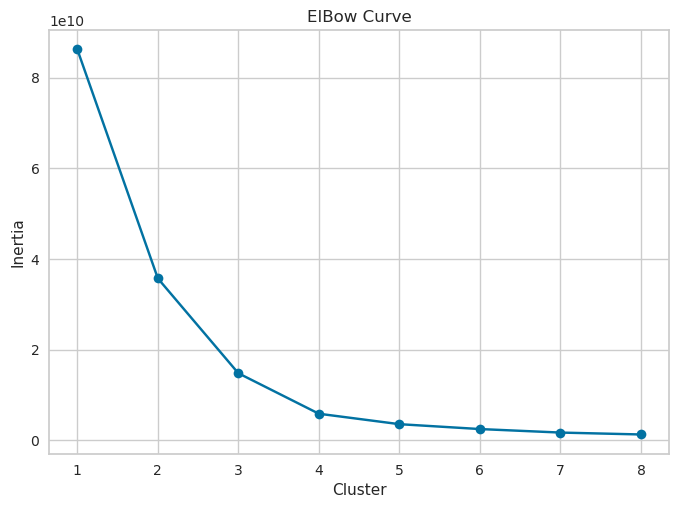

In [52]:
# Delete the target variable from features
X_features = df.drop(['Fraud'], axis=1)
print(X_features)

# Create a KMeans model with 2 clusters and fit the data to it
kmeans = KMeans(n_clusters=2, max_iter = 1000)
predictions = kmeans.fit_predict(X_features)
print(predictions)

# Find the centroids of the clusters
centroids = kmeans.cluster_centers_
print(centroids)

# Calculate the silhouette score for the model
silhouette = silhouette_score(X_features, predictions)
print(silhouette)

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot the clusters for Income vs Employed
ax[0][0].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Employed'], marker='^', c="y")
ax[0][0].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Employed'], marker='s', c='m')
ax[0][0].scatter(centroids[:, 0], centroids[:, 1], c='k', marker='o', s=300)

# Plot the clusters for Income vs Education
ax[0][1].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Education'], marker='^', c="y")
ax[0][1].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Education'], marker='s', c='m')
ax[0][1].scatter(centroids[:, 0], centroids[:, 2], c='k', marker='o', s=300)

# Plot the clusters for Income vs Age
ax[1][0].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Age'], marker='^', c="y")
ax[1][0].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Age'], marker='s', c='m')
ax[1][0].scatter(centroids[:, 0], centroids[:, 3], c='k', marker='o', s=300)

# Plot the clusters for Income vs Colour
ax[1][1].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Colour'], marker='^', c="y")
ax[1][1].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Colour'], marker='s', c='m')
ax[1][1].scatter(centroids[:, 0], centroids[:, 4], c='k', marker='o', s=300)

# Add x and y labels to each plot
ax[0][0].set_xlabel('Income')
ax[0][0].set_ylabel('Employed')
ax[0][1].set_xlabel('Income')
ax[0][1].set_ylabel('Education')
ax[1][0].set_xlabel('Income')
ax[1][0].set_ylabel('Age')
ax[1][1].set_xlabel('Income')
ax[1][1].set_ylabel('Colour')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

# Visualise silhouette score
visModel = SilhouetteVisualizer(kmeans)
visModel.fit(X_features)
visModel.poof()

# plot elbow curve
plot_elbow_curve(X_features)


## Clustering number is 3

     Income  Employed  Education   Age  Colour
0     10500         0          1  25.0       5
1     26525         1          0  25.0       1
2      8230         0          1  25.0       4
3     25000         0          2  19.0       5
4     15250         0          1  23.0       4
..      ...       ...        ...   ...     ...
115   45050         1          2  54.0       5
116   11250         0          1  29.0       4
117    7450         0          0  19.0       4
118   12250         0          2  25.0       5
119    8450         0          1  23.0       4

[120 rows x 5 columns]
[0 0 0 0 0 1 2 0 1 0 2 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 2 1 0 1 1 1 0
 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 2 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0
 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1
 0 1 0 0 1 0 0 0 0]
[[1.39493548e+04 1.61290323e-02 7.58064516e-01 2.56451613e+01
  3.91935484e+00]
 [4.72096296e+04 5.92592593e-01 1.35185185e+00 3.89074074e+01
  2.53703704e+00]
 [1.305

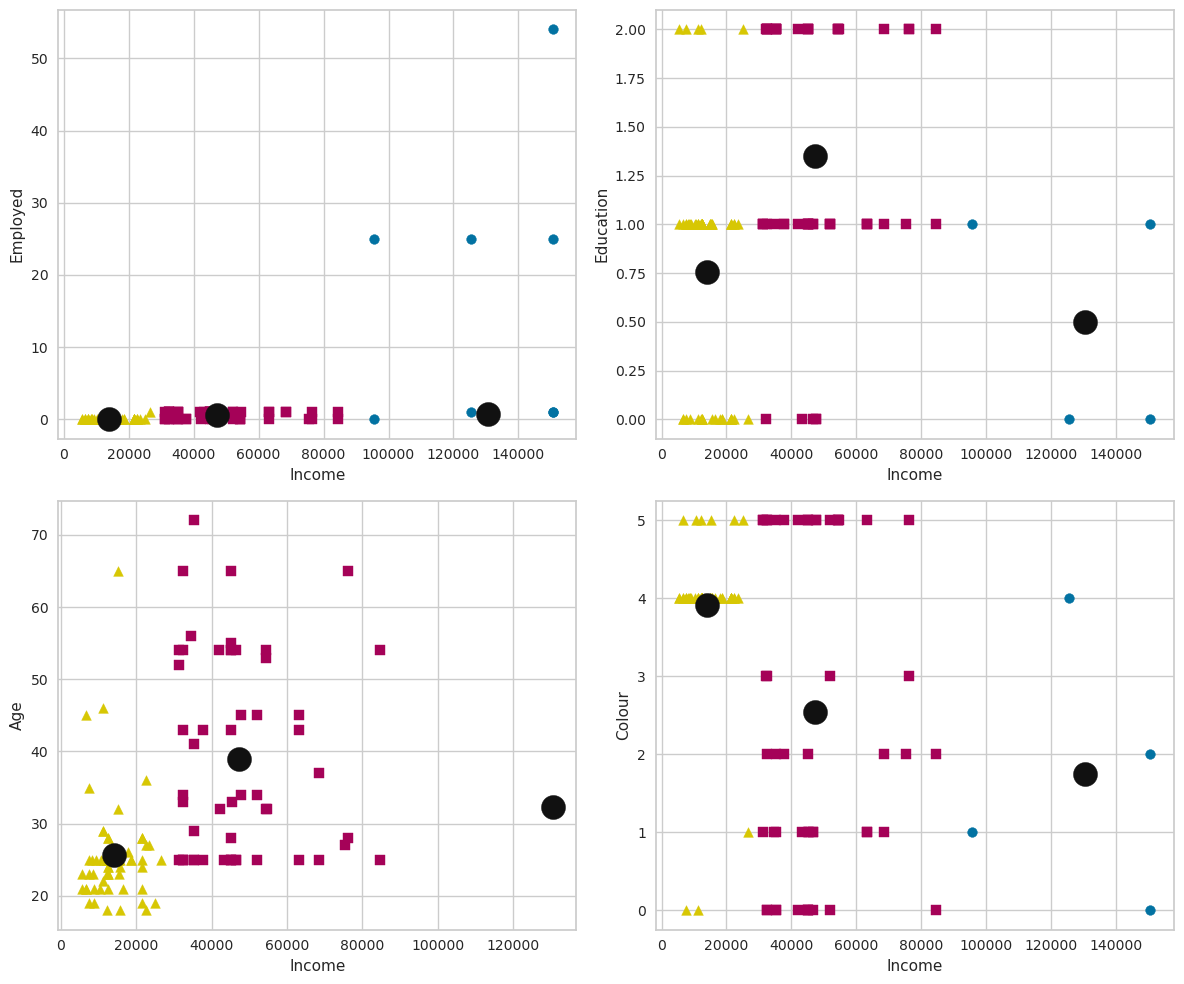

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


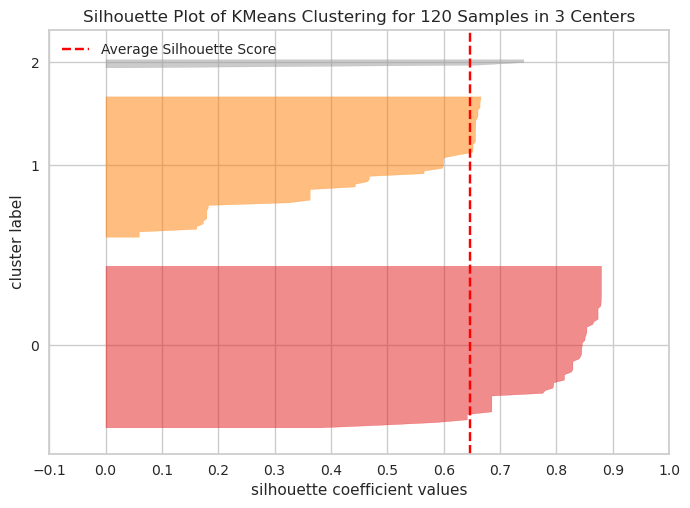

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 120 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
# Delete the target variable from features
X_features = df.drop(['Fraud'], axis=1)
print(X_features)

# Create a KMeans model with 2 clusters and fit the data to it
kmeans = KMeans(n_clusters=3, max_iter = 1000)
predictions = kmeans.fit_predict(X_features)
print(predictions)

# Find the centroids of the clusters
centroids = kmeans.cluster_centers_
print(centroids)

# Calculate the silhouette score for the model
silhouette = silhouette_score(X_features, predictions)
print(silhouette)

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot the clusters for Income vs Employed
ax[0][0].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Employed'], marker='^', c="y")
ax[0][0].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Employed'], marker='s', c='m')
ax[0][0].scatter(X_features[predictions==2]['Income'], X_features[predictions==2]['Employed'], marker='o', c="b")
ax[0][0].scatter(centroids[:, 0], centroids[:, 1], c='k', marker='o', s=300)

# Plot the clusters for Income vs Education
ax[0][1].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Education'], marker='^', c="y")
ax[0][1].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Education'], marker='s', c='m')
ax[0][1].scatter(X_features[predictions==2]['Income'], X_features[predictions==2]['Education'], marker='o', c="b")
ax[0][1].scatter(centroids[:, 0], centroids[:, 2], c='k', marker='o', s=300)

# Plot the clusters for Income vs Age
ax[1][0].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Age'], marker='^', c="y")
ax[1][0].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Age'], marker='s', c='m')
ax[0][0].scatter(X_features[predictions==2]['Income'], X_features[predictions==2]['Age'], marker='o', c="b")
ax[1][0].scatter(centroids[:, 0], centroids[:, 3], c='k', marker='o', s=300)

# Plot the clusters for Income vs Colour
ax[1][1].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Colour'], marker='^', c="y")
ax[1][1].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Colour'], marker='s', c='m')
ax[1][1].scatter(X_features[predictions==2]['Income'], X_features[predictions==2]['Colour'], marker='o', c="b")
ax[1][1].scatter(centroids[:, 0], centroids[:, 4], c='k', marker='o', s=300)

# Add x and y labels to each plot
ax[0][0].set_xlabel('Income')
ax[0][0].set_ylabel('Employed')
ax[0][1].set_xlabel('Income')
ax[0][1].set_ylabel('Education')
ax[1][0].set_xlabel('Income')
ax[1][0].set_ylabel('Age')
ax[1][1].set_xlabel('Income')
ax[1][1].set_ylabel('Colour')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

# Visualise silhouette score
visModel = SilhouetteVisualizer(kmeans)
visModel.fit(X_features)
visModel.poof()

## Clustering number is 4

     Income  Employed  Education   Age  Colour
0     10500         0          1  25.0       5
1     26525         1          0  25.0       1
2      8230         0          1  25.0       4
3     25000         0          2  19.0       5
4     15250         0          1  23.0       4
..      ...       ...        ...   ...     ...
115   45050         1          2  54.0       5
116   11250         0          1  29.0       4
117    7450         0          0  19.0       4
118   12250         0          2  25.0       5
119    8450         0          1  23.0       4

[120 rows x 5 columns]
[1 1 1 1 1 2 3 1 0 1 3 1 1 1 2 2 1 2 2 2 1 1 2 2 1 1 1 2 2 1 0 2 1 0 2 2 1
 0 2 2 1 2 1 1 1 2 1 1 0 2 2 0 1 2 2 1 0 1 3 1 1 1 2 2 1 2 1 0 2 2 1 2 1 1
 1 1 1 2 1 2 1 0 2 2 1 1 2 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 2 1 2 0 2 2 0 1 2
 1 2 1 1 2 1 1 1 1]
[[7.44913636e+04 5.45454545e-01 1.36363636e+00 3.62727273e+01
  2.09090909e+00]
 [1.39493548e+04 1.61290323e-02 7.58064516e-01 2.56451613e+01
  3.91935484e+00]
 [4.148

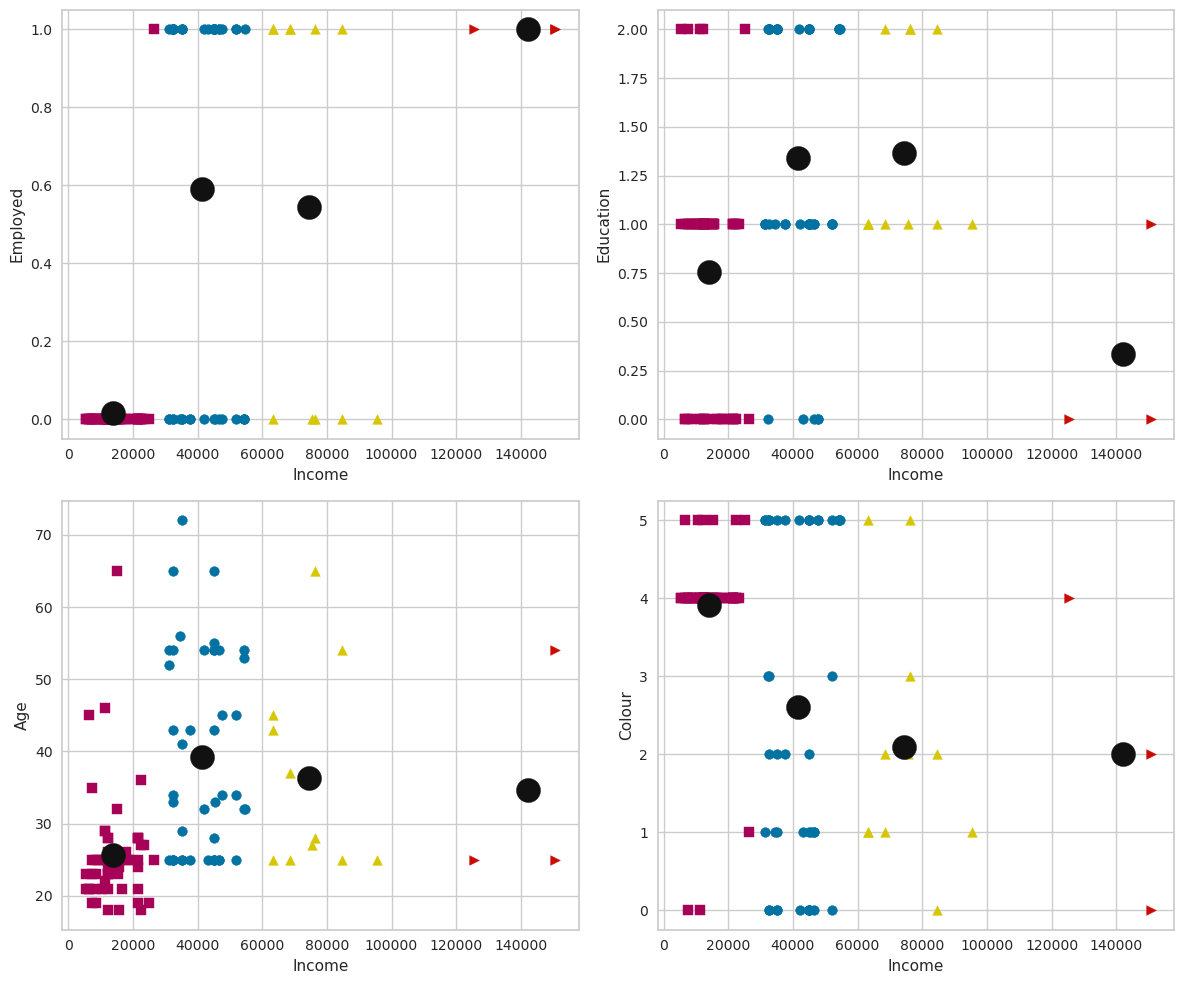

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


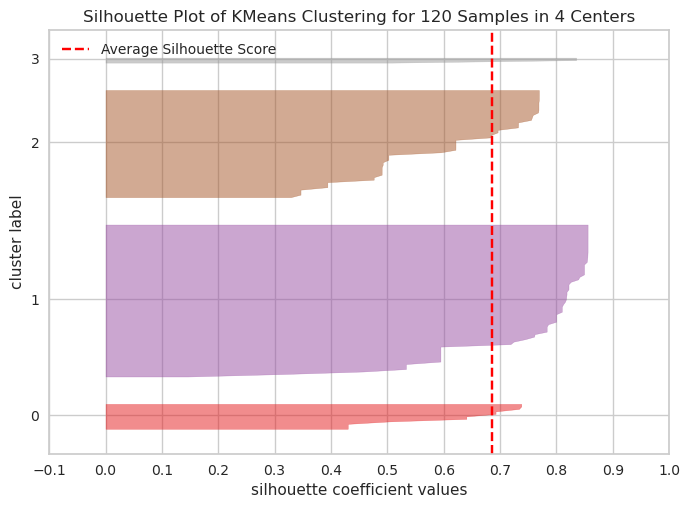

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 120 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
# Delete the target variable from features
X_features = df.drop(['Fraud'], axis=1)
print(X_features)

# Create a KMeans model with 2 clusters and fit the data to it
kmeans = KMeans(n_clusters=4, max_iter = 1000)
predictions = kmeans.fit_predict(X_features)
print(predictions)

# Find the centroids of the clusters
centroids = kmeans.cluster_centers_
print(centroids)

# Calculate the silhouette score for the model
silhouette = silhouette_score(X_features, predictions)
print(silhouette)

# Create a figure with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot the clusters for Income vs Employed
ax[0][0].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Employed'], marker='^', c="y")
ax[0][0].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Employed'], marker='s', c='m')
ax[0][0].scatter(X_features[predictions==2]['Income'], X_features[predictions==2]['Employed'], marker='o', c="b")
ax[0][0].scatter(X_features[predictions==3]['Income'], X_features[predictions==3]['Employed'], marker='>', c='r')
ax[0][0].scatter(centroids[:, 0], centroids[:, 1], c='k', marker='o', s=300)

# Plot the clusters for Income vs Education
ax[0][1].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Education'], marker='^', c="y")
ax[0][1].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Education'], marker='s', c='m')
ax[0][1].scatter(X_features[predictions==2]['Income'], X_features[predictions==2]['Education'], marker='o', c="b")
ax[0][1].scatter(X_features[predictions==3]['Income'], X_features[predictions==3]['Education'], marker='>', c='r')
ax[0][1].scatter(centroids[:, 0], centroids[:, 2], c='k', marker='o', s=300)

# Plot the clusters for Income vs Age
ax[1][0].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Age'], marker='^', c="y")
ax[1][0].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Age'], marker='s', c='m')
ax[1][0].scatter(X_features[predictions==2]['Income'], X_features[predictions==2]['Age'], marker='o', c="b")
ax[1][0].scatter(X_features[predictions==3]['Income'], X_features[predictions==3]['Age'], marker='>', c='r')
ax[1][0].scatter(centroids[:, 0], centroids[:, 3], c='k', marker='o', s=300)

# Plot the clusters for Income vs Colour
ax[1][1].scatter(X_features[predictions==0]['Income'], X_features[predictions==0]['Colour'], marker='^', c="y")
ax[1][1].scatter(X_features[predictions==1]['Income'], X_features[predictions==1]['Colour'], marker='s', c='m')
ax[1][1].scatter(X_features[predictions==2]['Income'], X_features[predictions==2]['Colour'], marker='o', c="b")
ax[1][1].scatter(X_features[predictions==3]['Income'], X_features[predictions==3]['Colour'], marker='>', c='r')
ax[1][1].scatter(centroids[:, 0], centroids[:, 4], c='k', marker='o', s=300)

# Add x and y labels to each plot
ax[0][0].set_xlabel('Income')
ax[0][0].set_ylabel('Employed')
ax[0][1].set_xlabel('Income')
ax[0][1].set_ylabel('Education')
ax[1][0].set_xlabel('Income')
ax[1][0].set_ylabel('Age')
ax[1][1].set_xlabel('Income')
ax[1][1].set_ylabel('Colour')

# Adjust spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

# Visualise silhouette score
visModel = SilhouetteVisualizer(kmeans)
visModel.fit(X_features)
visModel.poof()